## Common python packages used for deep learning

[Resource](https://github.com/EdwardRaff/Inside-Deep-Learning)

In [ ]:
# packages for routine python code
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
import seaborn as sns
# packages for machine learning
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
# common utils
import time
from tqdm.autonotebook import tqdm
# packages for deep learning
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
import torchvision 
from torchvision import transforms

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  if __name__ == '__main__':


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pwd

/content


#### Import the module from "Inside Deep Learning" book.

In [ ]:
from mpdl import train_simple_network

In [ ]:
# setup for matplotlib in Jupyter Notebook
%matplotlib inline
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('png', 'pdf')

## Make your code reproducible

In [ ]:
def set_seed(seed):
    torch.manual_seed(seed)
    np.random.seed(seed)

In [ ]:
torch.backends.cudnn.deterministic=True
set_seed(42)

## Pytorch Basics (comparable to Numpy)

In [ ]:
torch_scalar = torch.tensor(3.14)
torch_vector = torch.tensor([1, 2, 3, 4])
torch_matrix = torch.tensor([[1, 2,],
                             [3, 4,],
                             [5, 6,], 
                             [7, 8,]])
#You don't have to format it like I did, thats just for clarity
torch_tensor3d = torch.tensor([
                            [
                            [ 1,  2,  3], 
                            [ 4,  5,  6],
                            ],
                            [
                            [ 7,  8,  9], 
                            [10, 11, 12],
                            ],
                            [
                            [13, 14, 15], 
                            [16, 17, 18],
                            ],
                            [
                            [19, 20, 21], 
                            [22, 23, 24],
                            ]
                              ])

In [ ]:
print(torch_scalar.shape)
print(torch_vector.shape)
print(torch_matrix.shape)
print(torch_tensor3d.shape)

torch.Size([])
torch.Size([4])
torch.Size([4, 2])
torch.Size([4, 2, 3])


In [ ]:
x_np = np.random.random((4,4))
print(x_np)

[[0.37454012 0.95071431 0.73199394 0.59865848]
 [0.15601864 0.15599452 0.05808361 0.86617615]
 [0.60111501 0.70807258 0.02058449 0.96990985]
 [0.83244264 0.21233911 0.18182497 0.18340451]]


In [ ]:
set_seed(42)

In [ ]:
x_np = np.random.random((4,4))
print(x_np)

[[0.37454012 0.95071431 0.73199394 0.59865848]
 [0.15601864 0.15599452 0.05808361 0.86617615]
 [0.60111501 0.70807258 0.02058449 0.96990985]
 [0.83244264 0.21233911 0.18182497 0.18340451]]


### Convert numpy array to torch tensor

In [ ]:
x_pt = torch.tensor(x_np)
print(x_pt)

tensor([[0.3745, 0.9507, 0.7320, 0.5987],
        [0.1560, 0.1560, 0.0581, 0.8662],
        [0.6011, 0.7081, 0.0206, 0.9699],
        [0.8324, 0.2123, 0.1818, 0.1834]], dtype=torch.float64)


In [ ]:
print(x_np.dtype, x_pt.dtype)

float64 torch.float64


In [ ]:
#Lets force them to be 32-bit floats
x_np = np.asarray(x_np, dtype=np.float32)
x_pt = torch.tensor(x_np, dtype=torch.float32)
print(x_np.dtype, x_pt.dtype)

float32 torch.float32


### Numpy vs Torch.tensor

In [ ]:
b_np = (x_np > 0.5)
print(b_np)
print(b_np.dtype)

[[False  True  True  True]
 [False False False  True]
 [ True  True False  True]
 [ True False False False]]
bool


In [ ]:
b_pt = (x_pt > 0.5)
print(b_pt)
print(b_pt.dtype)

tensor([[False,  True,  True,  True],
        [False, False, False,  True],
        [ True,  True, False,  True],
        [ True, False, False, False]])
torch.bool


In [ ]:
np.sum(x_np)

7.6018724

In [ ]:
torch.sum(x_pt)

tensor(7.6019)

In [ ]:
np.transpose(x_np)

array([[0.37454012, 0.15601864, 0.601115  , 0.83244264],
       [0.9507143 , 0.15599452, 0.7080726 , 0.21233912],
       [0.7319939 , 0.05808361, 0.02058449, 0.18182497],
       [0.5986585 , 0.8661761 , 0.96990985, 0.1834045 ]], dtype=float32)

In [ ]:
torch.transpose(x_pt, 0, 1)

tensor([[0.3745, 0.1560, 0.6011, 0.8324],
        [0.9507, 0.1560, 0.7081, 0.2123],
        [0.7320, 0.0581, 0.0206, 0.1818],
        [0.5987, 0.8662, 0.9699, 0.1834]])

In [ ]:
print(torch.transpose(torch_tensor3d, 0, 2).shape)

torch.Size([3, 2, 4])


## Using GPU

#### Get to know your GPU

In [ ]:
!nvidia-smi

Sat Oct  1 14:16:49 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   57C    P0    29W /  70W |    848MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
# Check nvcc version
!nvcc -V
# Check GCC version
!gcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2020 NVIDIA Corporation
Built on Mon_Oct_12_20:09:46_PDT_2020
Cuda compilation tools, release 11.1, V11.1.105
Build cuda_11.1.TC455_06.29190527_0
gcc (Ubuntu 7.5.0-3ubuntu1~18.04) 7.5.0
Copyright (C) 2017 Free Software Foundation, Inc.
This is free software; see the source for copying conditions.  There is NO
warranty; not even for MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.



In [ ]:
# Check Pytorch installation
print(torch.__version__, torch.cuda.is_available())

1.12.1+cu113 True


#### GPU, CUDA, nvcc, cuDNN
1) NVIDIA-Driver : NVIDIA Graphics Card Driver

2) CUDA : Compute Unified Device Architecture, which is a general parallel computing launched by NVIDIA architecture. The architecture enable the GPU to solve complex computing problems.

3) CuDNN : It is used for deep neural networks GPU acceleration library. It can be intergrated into advanced machine learning frameworks, such as Google’s Tensorflow, UC Berkeley’s caffe framework, Facebook’s PyTorch framework and so on.

4) CUDA Toolkit : It is a complete one officially provided by Nvidia Tool Installation package.
Use the CUDA Toolkit provided by Nvidia’s official website to install the tools needed to develop CUDA programs, including CUDA program compilers, IDEs, debuggers, etc., various library files corresponding to CUDA programs and their header files.

5) NVCC : It is CUDA compiler driver (translator), similar to gcc is the compiler of the c language.

[Resource](https://actruce.com/en/all-about-the-nvidia-driver-installation/)

In [ ]:
import timeit
x = torch.rand(2**11, 2**11)
time_cpu = timeit.timeit("x@x", globals=globals(), number=100)

In [ ]:
time_cpu

21.82012945800011

In [ ]:
print("Is CUDA available? :", torch.cuda.is_available())
device = torch.device("cuda")

Is CUDA available? : True


#### Push data to GPU

In [ ]:
x = x.to(device)
time_gpu = timeit.timeit("x@x", globals=globals(), number=100)
time_gpu

2.3707007620000695

#### Move any data to GPU

In [ ]:
def moveTo(obj, device):
    """
    obj: the python object to move to a device, or to move its contents to a device
    device: the compute device to move objects to
    """
    if isinstance(obj, list):
        return [moveTo(x, device) for x in obj]
    elif isinstance(obj, tuple):
        return tuple(moveTo(list(obj), device))
    elif isinstance(obj, set):
        return set(moveTo(list(obj), device))
    elif isinstance(obj, dict):
        to_ret = dict()
        for key, value in obj.items():
            to_ret[moveTo(key, device)] = moveTo(value, device)
        return to_ret
    elif hasattr(obj, "to"):
        return obj.to(device)
    else:
        return obj
    
some_tensors = [torch.tensor(1), torch.tensor(2)]
print(some_tensors)
print(moveTo(some_tensors, device))

[tensor(1), tensor(2)]
[tensor(1, device='cuda:0'), tensor(2, device='cuda:0')]


#### From tensor to numpy

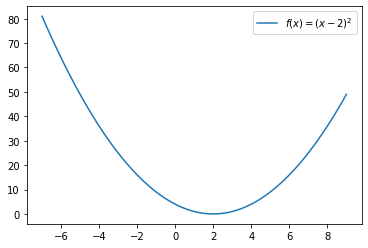

In [ ]:
def f(x):
    return torch.pow((x-2.0), 2)

x_axis_vals = np.linspace(-7,9,100) 
y_axis_vals = f(torch.tensor(x_axis_vals)).numpy()

sns.lineplot(x=x_axis_vals, y=y_axis_vals, label='$f(x)=(x-2)^2$')

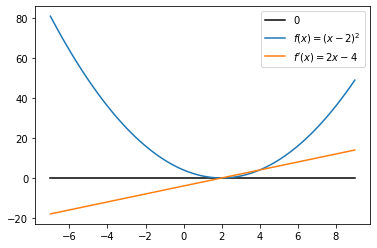

In [ ]:
def fP(x): #Defining the derivative of f(x) manually
    return 2*x-4

y_axis_vals_p = fP(torch.tensor(x_axis_vals)).numpy()

#First, lets draw a black line at 0, so that we can easily tell if something is positive or negative
sns.lineplot(x=x_axis_vals, y=[0.0]*len(x_axis_vals), label="0", color='black')
sns.lineplot(x=x_axis_vals, y=y_axis_vals, label='$f(x) = (x-2)^2$')
sns.lineplot(x=x_axis_vals, y=y_axis_vals_p, label="$f'(x)=2 x - 4$")

## Pytorch with derivative 

In [ ]:
x = torch.tensor([-3.5], requires_grad=True)
print(x.grad)

None


In [ ]:
value = f(x)
print(value)

tensor([30.2500], grad_fn=<PowBackward0>)


In [ ]:
value.backward()
print(x.grad)

tensor([-11.])


## Setup a neural network using Pytorch

In [ ]:
x = torch.tensor([-3.5], requires_grad=True)

x_cur = x.clone()
x_prev = x_cur*100 #Make the initial "previous" solution larger
epsilon = 1e-5
eta = 0.1

while torch.linalg.norm(x_cur-x_prev) > epsilon:
    x_prev = x_cur.clone() #We need to make a clone here so that x_prev and x_cur don't point to the same object
    
    #Compute our function, gradient, and update
    value = f(x)
    value.backward()
    x.data -= eta * x.grad
    x.grad.zero_() #We need to zero out the old gradient, as py-torch will not do that for us
    
    #What are we currently now?
    x_cur = x.data
    
print(x_cur)

tensor([2.0000])


#### Using Pytorch modules for neural network

In [ ]:
x_param = torch.nn.Parameter(torch.tensor([-3.5]), requires_grad=True)

In [ ]:
optimizer = torch.optim.SGD([x_param], lr=eta)

In [ ]:
for epoch in range(60):
    optimizer.zero_grad() #x.grad.zero_()
    loss_incurred  = f(x_param)
    loss_incurred.backward()
    optimizer.step() #x.data -= eta * x.grad
print(x_param.data)

tensor([2.0000])


### Data Prepair for training

In [ ]:
from torch.utils.data import Dataset
from sklearn.datasets import fetch_openml

# Load data from https://www.openml.org/d/554
X, y = fetch_openml('mnist_784', version=1, return_X_y=True, as_frame=False)
print(X.shape)

(70000, 784)


In [ ]:
class SimpleDataset(Dataset):
        
    def __init__(self, X, y):
        super(SimpleDataset, self).__init__()
        self.X = X
        self.y = y
    
    def __getitem__(self, index):
        #This "work" could have gone in the constructor, but you should get into 
        inputs = torch.tensor(self.X[index,:], dtype=torch.float32)
        targets = torch.tensor(int(self.y[index]), dtype=torch.int64)
        return inputs, targets 

    def __len__(self):
        return self.X.shape[0]
#Now we can make a PyTorch dataset 
dataset = SimpleDataset(X, y)

In [ ]:
print("Length: ", len(dataset))
example, label = dataset[0]
print("Features: ", example.shape) #Will return 784
print("Label of index 0: ", label)

Length:  70000
Features:  torch.Size([784])
Label of index 0:  tensor(5)


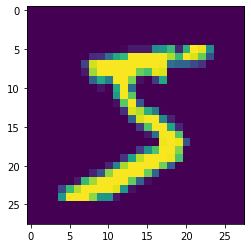

In [ ]:
plt.imshow(example.reshape((28,28)))

In [ ]:
train_size = int(len(dataset)*0.8)
test_size = len(dataset)-train_size

train_dataset, test_dataset = torch.utils.data.random_split(dataset, (train_size, test_size))
print("{} examples for training and {} for testing".format(len(train_dataset), len(test_dataset)))

56000 examples for training and 14000 for testing


## Why does neural network work?

In [ ]:
from sklearn.datasets import make_moons

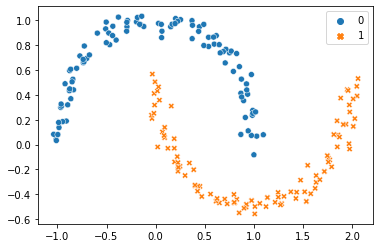

In [ ]:
X, y = make_moons(n_samples=200, noise=0.05)
sns.scatterplot(x=X[:,0], y=X[:,1], hue=y, style=y)

To make our lives easier, we will use the built in TensorDataset object to wrap our current data. This only works if we can fit all of our data into RAM. 

We did make one important change though. Our vector or labels $y$ is now a `torch.long` rather than a `torch.float32`. Why is this? Becuase the labels are now classes, which start from $0$ and go up to $C-1$ to represent $C$ different classes. There is no $0.25$ class, only integers! For this reason, we use the long data type (a 64-bit integer) rather than a floating point value, since we only need to concern ourselves with integers. 

Why not a `torch.int` or `torch.int32` type, to match the 32-bit floats? Because PyTorch is written to work with 64-bit integers, and most of the codebase has hard-coded to 64-bit integers. It was a design choice made early on, and we must abide by it to use PyTorch. 

In [ ]:
classification_dataset = torch.utils.data.TensorDataset(torch.tensor(X, dtype=torch.float32),
                                                        torch.tensor(y, dtype=torch.long))
training_loader = DataLoader(classification_dataset, shuffle=True)

Now we define a linear classification model just like we did previously. In this case, we have two features, and we have two outputs (one for each class). So our model will be slightly bigger. 

In [ ]:
in_features = 2
out_features = 2
model = nn.Linear(in_features, out_features)

The big question is, what do we use as our loss function? This was an easy question to answer when we did a regression problem. We had two inputs, and they were both floating point values, so we could just subtract them to determine how far away the two values are. This is different though. Now our prediction $\hat{\boldsymbol{y}} \in \mathbb{R}^C$, because we need to have a prediction for each of our $C$ different classes. But our labels are one value of a set of integers, $y \in \{0, 1, \ldots, C-1\}$. 

First, we intuitively want the dimension in $\hat{\boldsymbol{y}}$ that has the largest value to correspond to the correct class label $y$. If we wrote this in math, that would mean we want:

$$y = \underset{i}{\operatorname{argmax}} \hat{\boldsymbol{y}}_i$$

The other thing we want is that our predictions should be a sensible probability. Why? Consider that the correct class is $y=k$, and that we succeed and have $\hat{\boldsymbol{y}}_k$ is the largest value. How "right" or "wrong" is this? What if $\hat{\boldsymbol{y}}_{k}-\hat{\boldsymbol{y}}_{j} = 0.00001$? The difference is very small, and we want a way to tell the model that it should become more confident. 

If we made $\hat{\boldsymbol{y}}$ into probabilities, then they have to sum up to 1. That means: 

$$\sum_{i=0}^{C-1} \hat{\boldsymbol{y}}_i = 1$$

This way we know a model is confident in its prediction when $\hat{y}_k = 1$, and all other values of $j \neq k$ result in $\hat{\boldsymbol{y}}_j = 0$. If the model was less confident, we might see $\hat{\boldsymbol{y}}_k =0.9$, and if it was completely wrong, $\hat{\boldsymbol{y}}_k =0$. 

But how do we ensure this? The values that we get from the last Linear layer could be anything, especially when we first start training and have not had a chance to teach the model about what is correct. We use what is called the _Soft Maximum_ function. It is called such because the value $k$ with the largest value will have the largest value afterwards as well, but smaller values will also receive smaller but non-zero values too. So it will give every value in $0, 1, \ldots, C-1$ a value in the range $[0, 1]$, such that they all sum up to one as well!

We can write this out as:

$$\text{sm}(\boldsymbol{x})_i = \frac{\exp(\boldsymbol{x}_i)}{\sum_{j=0}^{d} \exp(\boldsymbol{x}_j)}$$

With this function in hand, we have one of the two tools we need to define a good loss function for classification problems. The second tool we need is called the _cross entropy_ loss. If we had two probability distributions $\boldsymbol{p}$ and $\boldsymbol{q}$, the cross entropy between these two distributions is:

$$\ell(\boldsymbol{p}, \boldsymbol{q}) = -\sum_{i=1}^{d} \boldsymbol{p}_i \cdot \log(\boldsymbol{q}_i)  $$

Why cross entropy? Its a statistical tool that tells us how much extra information it is going to take us to encode information we we used the distribution defined by $\boldsymbol{q}$ when $\boldsymbol{p}$ was correct distribution we should have been using. This has glossed over some of the precision of what the Cross-Entropy function is doing, but gives you an intuitive idea at a high level. 

Now, with these two tool combined, we arrive at a simple loss function and approach. We first apply the softmax function ($\text{sm}(x)$), followed by computing the cross-entropy. This simplifies down to

$$\ell(\hat{\boldsymbol{y}}, y) = - \log(\text{sm}(\hat{\boldsymbol{y}})_y)$$


This may seem a bit mysterious, and thats OK for now. There is a statistical interpretation of how we arrived at this loss function, and we use it because it has a strong statistical grounding and interpretation. It assures us that we will be able to interpret the results as being a probability distribution. For the case of a linear model, it results in the well known algorithm _linear regression_! 

Using this combination of Softmax followed by Cross-Entropy is so standard and well known, PyTorch integrates them into a single loss function `CrossEntropyLoss`, which performs both steps for us. This is good, because implementing the Softmax and CrossEntropy functions manually can lead to some tricky numerical stability issues, and so a good implementation is not as direct as you might think. 

But now that we know that, we can more forward and train a model. This was a lot of text to explain how we arrive at the single line of code below to define our loss function! 


In [ ]:
loss_func = nn.CrossEntropyLoss()

And now we can train our model!

In [ ]:
train_simple_network(model, loss_func, training_loader, epochs=50)

Epoch:   0%|          | 0/50 [00:00<?, ?it/s]

Train Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Train Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Train Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Train Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Train Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Train Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Train Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Train Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Train Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Train Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Train Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Train Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Train Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Train Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Train Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Train Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Train Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Train Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Train Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Train Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Train Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Train Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Train Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Train Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Train Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Train Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Train Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Train Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Train Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Train Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Train Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Train Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Train Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Train Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Train Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Train Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Train Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Train Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Train Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Train Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Train Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Train Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Train Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Train Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Train Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Train Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Train Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Train Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Train Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Train Batch:   0%|          | 0/200 [00:00<?, ?it/s]

epoch  total time  train loss
0       0    0.137623  161.863976
1       1    0.267370  152.980940
2       2    0.397974  145.058700
3       3    0.530508  138.006725
4       4    0.680007  131.735426
5       5    0.801972  126.155909
6       6    0.948914  121.186572
7       7    1.080185  116.754364
8       8    1.207078  112.792418
9       9    1.335538  109.239089
10     10    1.476133  106.043245
11     11    1.605508  103.165899
12     12    1.731311  100.563149
13     13    1.869852   98.203422
14     14    2.001666   96.059473
15     15    2.126100   94.101472
16     16    2.256848   92.310380
17     17    2.397082   90.663886
18     18    2.521541   89.148953
19     19    2.650964   87.748234
20     20    2.783184   86.452379
21     21    2.922249   85.248147
22     22    3.051944   84.128309
23     23    3.180513   83.083698
24     24    3.320163   82.107398
25     25    3.461742   81.192737
26     26    3.599771   80.332866
27     27    3.728793   79.524287
28     28    3.878181   78.762628
29     29    4.015553   78.043266
30     30    4.158409   77.362074
31     31    4.287060   76.716432
32     32    4.430321   76.103464
33     33    4.571303   75.520618
34     34    4.704993   74.965576
35     35    4.854192   74.436835
36     36    4.983890   73.931305
37     37    5.120709   73.448904
38     38    5.258219   72.987123
39     39    5.399295   72.544636
40     40    5.532873   72.119117
41     41    5.674756   71.711179
42     42    5.807987   71.320416
43     43    5.951871   70.943096
44     44    6.097887   70.579671
45     45    6.233788   70.229314
46     46    6.380531   69.891635
47     47    6.524056   69.564713
48     48    6.661744   69.249195
49     49    6.796271   68.943986

With our model trained, lets visualize the results. Since this is a 2-d function, its a little more complicated than our previous regression case. We will use a kind of contour-plot to show the decision surface of our algorithm. Where dark blue represents the first class, dark red the second class, and the color will lighten/transition as the model's confidence decreases and increases. 

In [ ]:
def visualize2DSoftmax(X, y, model):
    x_min = np.min(X[:,0])-0.5
    x_max = np.max(X[:,0])+0.5
    y_min = np.min(X[:,1])-0.5
    y_max = np.max(X[:,1])+0.5
    xv, yv = np.meshgrid(np.linspace(x_min, x_max, num=20), np.linspace(y_min, y_max, num=20), indexing='ij')
    xy_v = np.hstack((xv.reshape(-1,1), yv.reshape(-1,1)))
    with torch.no_grad():
        preds = model(torch.tensor(xy_v, dtype=torch.float32))
        preds = F.softmax(preds, dim=1).numpy()

    cs = plt.contourf(xv, yv, preds[:,0].reshape(20,20), levels=np.linspace(0,1,num=20), cmap=plt.cm.RdYlBu)
    sns.scatterplot(x=X[:,0], y=X[:,1], hue=y, style=y, ax=cs.ax)

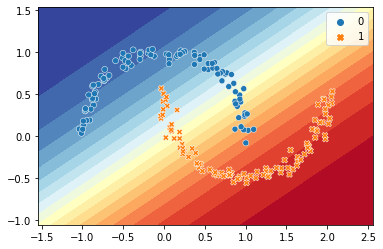

In [ ]:
visualize2DSoftmax(X, y, model)


Above we can now see the results of our model on this data! Overall a decent job, most of the blue circles are in the blue region, and the red crosses in the red region. There is a middle ground where errors are being made, because our problem can not be fully solved with a linear model. 

Now we do the same as we did with our regression problem, we will add in a hidden layer to increase the complexity of the neural network. In this case, we will go ahead and add two hidden layers, just to show how easy it is! 

In [ ]:
model = nn.Sequential(
    nn.Linear(2,  31),
    nn.Tanh(),
    nn.Linear(31,  30),
    nn.Tanh(),
    nn.Linear(30, 2),
)
train_simple_network(model, loss_func, training_loader, epochs=250)




Epoch:   0%|          | 0/250 [00:00<?, ?it/s]

Train Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Train Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Train Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Train Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Train Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Train Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Train Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Train Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Train Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Train Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Train Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Train Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Train Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Train Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Train Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Train Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Train Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Train Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Train Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Train Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Train Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Train Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Train Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Train Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Train Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Train Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Train Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Train Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Train Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Train Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Train Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Train Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Train Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Train Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Train Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Train Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Train Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Train Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Train Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Train Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Train Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Train Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Train Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Train Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Train Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Train Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Train Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Train Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Train Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Train Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Train Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Train Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Train Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Train Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Train Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Train Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Train Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Train Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Train Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Train Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Train Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Train Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Train Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Train Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Train Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Train Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Train Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Train Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Train Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Train Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Train Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Train Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Train Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Train Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Train Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Train Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Train Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Train Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Train Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Train Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Train Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Train Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Train Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Train Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Train Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Train Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Train Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Train Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Train Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Train Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Train Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Train Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Train Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Train Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Train Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Train Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Train Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Train Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Train Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Train Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Train Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Train Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Train Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Train Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Train Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Train Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Train Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Train Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Train Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Train Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Train Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Train Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Train Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Train Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Train Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Train Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Train Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Train Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Train Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Train Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Train Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Train Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Train Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Train Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Train Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Train Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Train Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Train Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Train Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Train Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Train Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Train Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Train Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Train Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Train Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Train Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Train Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Train Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Train Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Train Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Train Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Train Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Train Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Train Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Train Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Train Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Train Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Train Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Train Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Train Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Train Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Train Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Train Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Train Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Train Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Train Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Train Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Train Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Train Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Train Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Train Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Train Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Train Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Train Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Train Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Train Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Train Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Train Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Train Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Train Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Train Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Train Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Train Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Train Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Train Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Train Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Train Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Train Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Train Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Train Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Train Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Train Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Train Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Train Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Train Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Train Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Train Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Train Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Train Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Train Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Train Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Train Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Train Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Train Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Train Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Train Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Train Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Train Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Train Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Train Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Train Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Train Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Train Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Train Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Train Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Train Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Train Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Train Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Train Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Train Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Train Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Train Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Train Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Train Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Train Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Train Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Train Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Train Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Train Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Train Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Train Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Train Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Train Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Train Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Train Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Train Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Train Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Train Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Train Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Train Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Train Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Train Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Train Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Train Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Train Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Train Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Train Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Train Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Train Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Train Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Train Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Train Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Train Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Train Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Train Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Train Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Train Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Train Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Train Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Train Batch:   0%|          | 0/200 [00:00<?, ?it/s]

epoch  total time  train loss
0        0    0.209101  128.969723
1        1    0.387652  117.330411
2        2    0.552996  107.911844
3        3    0.730784  100.247546
4        4    0.920047   93.940545
..     ...         ...         ...
245    245   47.835639   38.534245
246    246   48.050550   38.232554
247    247   48.275945   37.998153
248    248   48.510255   37.783262
249    249   48.720090   37.398216

[250 rows x 3 columns]

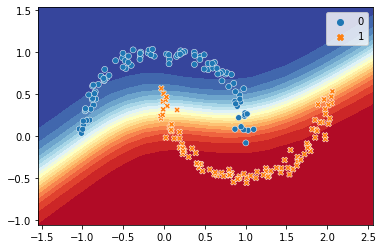

In [ ]:
visualize2DSoftmax(X, y, model)

# Better Training Code

We've now successfully trained fully connected networks for regression and classification problems. There is still a lot of room for us to improve our approaches. In particular, we have been training and evaluating visually on the same data. _This is not ok_. We also have another issue when dealing with classification problems: minimizing the cross-entropy loss is not really our goal. Our goal was to minimize errors, but we can't define "errors" in a differentiable way that will work with PyTorch, so we had to develop this proxy metric of cross-entropy instead. So reporting the loss after every epoch for a classification problem is not as helpful, because it was not our true goal. 

We are going to talk about a number of changes we will make to our training code, that will give us much more robust tools. 

## Validation & Test Passes

So we are going to modify our training function to better support real life work. Our code will support three different loaders, rather than just one. These will be:

1. The training data loader. This is what we use to adjust the weights of our network, based on the errors made. 
2. The testing data loader. This data will be evaluated once at the end of training so that we can determine how well our model really did. 
2. An optional _validation data_ loader. This is another set of data not used for training, but which we use to score our performance after every epoch. 

If we are being proper in our evaluations, we should use only the validation performance to make adjustments and changes to our code, hyper-parameters, network architecture, etc. We should only look at the test loss once at the very end. 

Using the test-set only once is the ideal method of performing work. Unfortunately, this does not always happen. Sometimes it is too expensive, or we do not have enough data. It is understandable if you can't set this up when doing real work, but you should always strive for it. 


## Dynamic Metrics

Another issue with our code is, as mentioned, the metrics we care about (accuracy) may not be the same metrics we used to train our model (cross-entropy). To help with this, we will modify our code so that we can pass in functions to compute different metrics from the labels and predicted values. We will also want to know about about how these metrics vary across our training, testing, and validation datasets. So we will record multiple versions, one for each type of data set. 

To make our lives easier, we will make it so our code will work well with most of the metrics [provided](https://scikit-learn.org/stable/modules/classes.html#sklearn-metrics-metrics) by the Scikit-Learn library. 


## Saving Checkpoints

The last modification we will make is the ability to save a simple checkpoint of the most recently completed epoch. In PyTorch, we are given a `torch.load` and `torch.save` function that can be used for this purpose. While there is more than one way to use these methods, we recommend using the dictionary style approach that you will see below. This lets us save the model, the optimizer state, and other information as well, all in one object.

We need to be able to save our model so that when we are ready to use it, we do not have to train if from scratch again! Saving after every epoch is a better idea though, especially when you start to train networks that can take weeks to complete. Sometimes, we may find that our code fails after many epochs, or a power failure interrupts our job. By saving the model after every epoch, we can resume our training from the last epoch, rather than having to start from scratch. 


In [ ]:
def train_simple_network(model, loss_func, train_loader, val_loader=None, score_funcs=None, 
                         epochs=50, device="cpu", checkpoint_file=None):
    """Train simple neural networks
    
    Keyword arguments:
    model -- the PyTorch model / "Module" to train
    loss_func -- the loss function that takes in batch in two arguments, the model outputs and the labels, and returns a score
    train_loader -- PyTorch DataLoader object that returns tuples of (input, label) pairs. 
    val_loader -- Optional PyTorch DataLoader to evaluate on after every epoch
    score_funcs -- A dictionary of scoring functions to use to evalue the performance of the model
    epochs -- the number of training epochs to perform
    device -- the compute lodation to perform training
    
    """
    to_track = ["epoch", "total time", "train loss"]
    if val_loader is not None:
        to_track.append("val loss")
    for eval_score in score_funcs:
        to_track.append("train " + eval_score )
        if val_loader is not None:
            to_track.append("val " + eval_score )
        
    total_train_time = 0 #How long have we spent in the training loop? 
    results = {}
    #Initialize every item with an empty list
    for item in to_track:
        results[item] = []
    
    #SGD is Stochastic Gradient Decent.
    optimizer = torch.optim.SGD(model.parameters(), lr=0.001)

    #Place the model on the correct compute resource (CPU or GPU)
    model.to(device)
    for epoch in tqdm(range(epochs), desc="Epoch"):
    
        model = model.train()#Put our model in training mode
        running_loss = 0.0
        
        y_true = []
        y_pred = []

        start = time.time()
        for inputs, labels in tqdm(train_loader, desc="Train Batch", leave=False):
      
            #Move the batch to the device we are using. 
            inputs = inputs.to(device)
            labels = labels.to(device)
            
            batch_size = inputs.shape[0]

            # PyTorch stores gradients in a mutable data structure. So we need to set it to a clean state before we use it. 
            #Otherwise, it will have old information from a previous iteration
            optimizer.zero_grad()

            y_hat = model(inputs) #this just computed f_Θ(x(i))

            # Compute loss.
            loss = loss_func(y_hat, labels)

            loss.backward()# ∇_Θ just got computed by this one call!

            #Now we just need to update all the parameters! 
            optimizer.step()# Θ_{k+1} = Θ_k − η * ∇_Θ ℓ(y_hat, y)

            #Now we are just grabbing some information we would like to have
            running_loss += loss.item() * inputs.size(0)
            
            #moving labels & predictions back to CPU for computing / storing predictions
            labels = labels.detach().cpu().numpy()
            y_hat = y_hat.detach().cpu().numpy()
            for i in range(batch_size):
                y_true.append(labels[i])
                y_pred.append(y_hat[i,:])
        #end training epoch
        end = time.time()
        total_train_time += (end-start)
        
        results["epoch"].append( epoch )
        results["total time"].append( total_train_time )
        results["train loss"].append( running_loss )
        
        y_pred = np.asarray(y_pred)
        
        if y_pred.shape[1] > 1: #We have a classification problem, convert to labels
            y_pred = np.argmax(y_pred, axis=1)
            
        for name, score_func in score_funcs.items():
            results["train " + name].append( score_func(y_true, y_pred) )
      
        if val_loader is None:
            pass
        else:#Lets find out validation performance as we go!
            model = model.eval() #Set the model to "evaluation" mode, b/c we don't want to make any updates!

            y_true = []
            y_pred = []
            
            running_loss = 0.0

            for inputs, labels in val_loader:
        
                #Move the batch to the device we are using. 
                inputs = inputs.to(device)
                labels = labels.to(device)
        
                y_hat = model(inputs)
            
                loss = loss_func(y_hat, labels)
                
                #Now we are just grabbing some information we would like to have
                running_loss += loss.item() * inputs.size(0)

                #moving labels & predictions back to CPU for computing / storing predictions
                labels = labels.detach().cpu().numpy()
                y_hat = y_hat.detach().cpu().numpy()
                for i in range(batch_size):
                    y_true.append(labels[i])
                    y_pred.append(y_hat[i,:])
                        
            results["val loss"].append( running_loss )

            y_pred = np.asarray(y_pred)

            if y_pred.shape[1] > 1: #We have a classification problem, convert to labels
                y_pred = np.argmax(y_pred, axis=1)

            for name, score_func in score_funcs.items():
                results["val " + name].append( score_func(y_true, y_pred) )
        # Saving all the parameters while model is training weights and biases         
        if checkpoint_file is not None:
            torch.save({
                'epoch': epoch,
                'model_state_dict': model.state_dict(),
                'optimizer_state_dict': optimizer.state_dict(),
                'results' : results
                }, checkpoint_file)

    return pd.DataFrame.from_dict(results)




With this new and improved code, lets re-train our model on the moons dataset. Since accuracy is what we really care about, we will import the accuracy metrics from Scikit-Learn. We will also include the F1 score metrics, simply to demonstrate how the code can handle two different metrics at the same time. 

We also want to do a better job at evaluation, and include a validation set. Since the moons data is synthetic, we can easily just create a new set of data for validation. 

In [ ]:
X_test, y_test = make_moons(n_samples=200, noise=0.05)
test_dataset = torch.utils.data.TensorDataset(torch.tensor(X_test, dtype=torch.float32),
                                                        torch.tensor(y_test, dtype=torch.long))
testing_loader = DataLoader(test_dataset)

Now we have everything we need to train our model again. We will use `"model.pt"` as the location to save our model's results. 

In [ ]:
model = nn.Sequential(
    nn.Linear(2,  30),
    nn.Tanh(),
    nn.Linear(30,  30),
    nn.Tanh(),
    nn.Linear(30, 2),
)
results_pd = train_simple_network(model, loss_func, training_loader, epochs=200, val_loader=testing_loader,
                                  checkpoint_file='model.pt',
                                  score_funcs={'Acc':accuracy_score,
                                               'F1': f1_score})


Epoch:   0%|          | 0/200 [00:00<?, ?it/s]

Train Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Train Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Train Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Train Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Train Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Train Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Train Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Train Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Train Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Train Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Train Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Train Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Train Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Train Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Train Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Train Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Train Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Train Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Train Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Train Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Train Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Train Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Train Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Train Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Train Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Train Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Train Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Train Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Train Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Train Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Train Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Train Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Train Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Train Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Train Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Train Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Train Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Train Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Train Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Train Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Train Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Train Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Train Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Train Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Train Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Train Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Train Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Train Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Train Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Train Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Train Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Train Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Train Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Train Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Train Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Train Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Train Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Train Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Train Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Train Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Train Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Train Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Train Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Train Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Train Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Train Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Train Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Train Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Train Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Train Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Train Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Train Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Train Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Train Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Train Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Train Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Train Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Train Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Train Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Train Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Train Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Train Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Train Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Train Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Train Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Train Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Train Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Train Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Train Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Train Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Train Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Train Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Train Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Train Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Train Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Train Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Train Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Train Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Train Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Train Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Train Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Train Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Train Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Train Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Train Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Train Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Train Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Train Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Train Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Train Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Train Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Train Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Train Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Train Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Train Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Train Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Train Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Train Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Train Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Train Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Train Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Train Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Train Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Train Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Train Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Train Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Train Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Train Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Train Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Train Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Train Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Train Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Train Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Train Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Train Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Train Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Train Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Train Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Train Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Train Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Train Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Train Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Train Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Train Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Train Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Train Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Train Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Train Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Train Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Train Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Train Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Train Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Train Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Train Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Train Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Train Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Train Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Train Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Train Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Train Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Train Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Train Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Train Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Train Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Train Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Train Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Train Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Train Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Train Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Train Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Train Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Train Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Train Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Train Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Train Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Train Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Train Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Train Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Train Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Train Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Train Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Train Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Train Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Train Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Train Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Train Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Train Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Train Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Train Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Train Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Train Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Train Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Train Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Train Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Train Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Train Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Train Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Train Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Train Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Train Batch:   0%|          | 0/200 [00:00<?, ?it/s]

Now lets look at some results! First, lets see that we can load our check point model, rather than just use the one already trained. In order to load a model, we first need to define a new model with the same modules as the original one. 

This is necessary so that the weights all match up. If you saved a model with 30 neurons in the second hidden layer, we need to have a new model with 30 neurons as well, otherwise there will be too few or too many, and an error will occur. 

One reason we use the `torch.load` and `torch.save` functions is the `map_location` argument that is used. This handles loading a model from the data to the correct compute device for us. 

Once we load in the dictionary of results, we can use the `load_state_dict` function to restore the states of our original model into this new object. Then we can apply it to the data, and see that we get the same results!

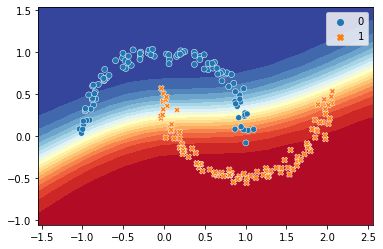

In [ ]:
model_new = nn.Sequential(
    nn.Linear(2,  30),
    nn.Tanh(),
    nn.Linear(30,  30),
    nn.Tanh(),
    nn.Linear(30, 2),
)

checkpoint_dict = torch.load('model.pt', map_location=device)


model_new.load_state_dict(checkpoint_dict['model_state_dict'])

visualize2DSoftmax(X, y, model_new)

Our new training function was written to return a Pandas dataframe object with information about the model after every epoch. This gives us some valuable information that we can easily visualize. For example, below we can quickly plot the training and validation accuracy as a function of the epoch that was finished. 

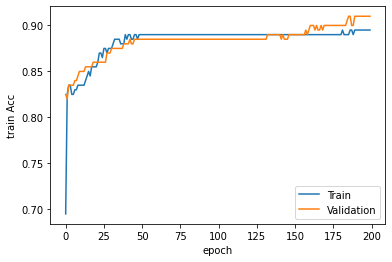

In [ ]:
sns.lineplot(x='epoch', y='train Acc', data=results_pd, label='Train')
sns.lineplot(x='epoch', y='val Acc', data=results_pd, label='Validation')

Or, we can look at the F1 score as a the literal amount of training time has changed. This will become more useful in the future if we want to compare how quickly two different models can learn. 

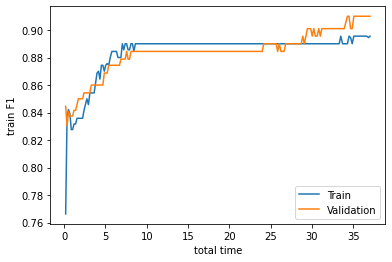

In [ ]:
sns.lineplot(x='total time', y='train F1', data=results_pd, label='Train')
sns.lineplot(x='total time', y='val F1', data=results_pd, label='Validation')

## Convolutional Neural Network

In [ ]:
mnist_data_train = torchvision.datasets.MNIST("./data", train=True, download=True)
mnist_data_test = torchvision.datasets.MNIST("./data", train=False, download=True)
x_example, y_example = mnist_data_train[0]
type(x_example)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



PIL.Image.Image

In [ ]:
mnist_data_train = torchvision.datasets.MNIST("./data", train=True, download=True, transform=transforms.ToTensor())
mnist_data_test = torchvision.datasets.MNIST("./data", train=False, download=True, transform=transforms.ToTensor())
x_example, y_example = mnist_data_train[0]
print(x_example.shape)

torch.Size([1, 28, 28])


#### A little bit of Computer Vision

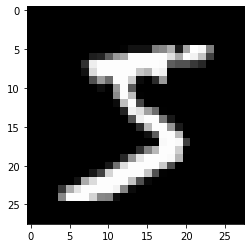

In [ ]:
imshow(x_example[0,:], cmap='gray')

In [ ]:
x_as_color = torch.stack([x_example[0,:], x_example[0,:], x_example[0,:]], dim=0)
print(x_as_color.shape)

torch.Size([3, 28, 28])


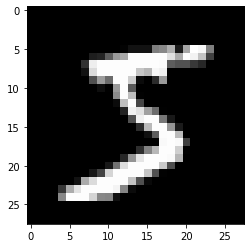

In [ ]:
imshow(x_as_color.permute(1,2,0))

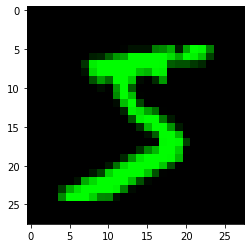

In [ ]:
x_as_color = torch.stack([x_example[0,:], x_example[0,:], x_example[0,:]])
x_as_color[0,:] = 0 #No Red
#Leaving green alone
x_as_color[2,:] = 0 #No Blue
imshow(x_as_color.permute(1,2,0))

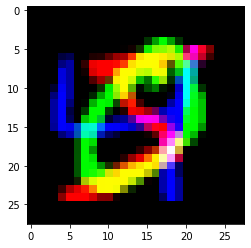

In [ ]:
#grab 3 images
x1, x2, x3 = mnist_data_train[0], mnist_data_train[1], mnist_data_train[2]
#drop the labels
x1, x2, x3 = x1[0], x2[0], x3[0]
x_as_color = torch.stack([x1[0,:], x2[0,:], x3[0,:]], dim=0)
imshow(x_as_color.permute(1,2,0))

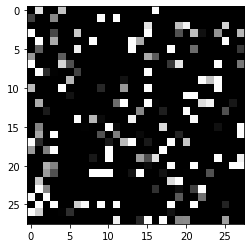

In [ ]:
rand_order = torch.randperm(x_example.shape[1] * x_example.shape[2])
x_shuffled = x_example.view(-1)[rand_order].view(x_example.shape)
imshow(x_shuffled[0,:], cmap='gray')

#### Convolution filters

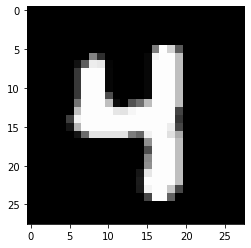

In [ ]:
from scipy.signal import convolve
img_indx = 58
img = mnist_data_train[img_indx][0][0,:]
plt.imshow(img, vmin=0, vmax=1, cmap='gray')

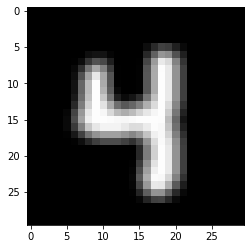

In [ ]:
blur_filter = np.asarray([[1,1,1],
                          [1,1,1],
                          [1,1,1]
                         ])/9.0

blurry_img = convolve(img, blur_filter)
plt.imshow(blurry_img, vmin=0, vmax=1, cmap='gray')
plt.show()

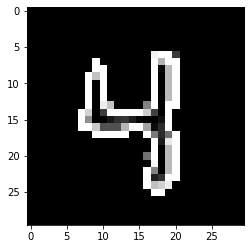

In [ ]:
#We can find edges by focusing on the difference between a pixel, and its neighbors
edge_filter = np.asarray([[-1,-1,-1],
                          [-1, 8,-1],
                          [-1,-1,-1]
                         ])


edge_img = convolve(img, edge_filter)
plt.imshow(edge_img, vmin=0, vmax=1, cmap='gray')
plt.show()

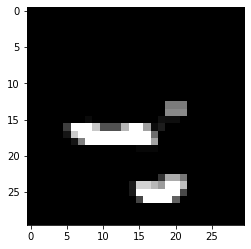

In [ ]:
#We could look for only horizontal edges
h_edge_filter = np.asarray([[-1,-1,-1],
                          [0, 0,0],
                          [1, 1, 1]
                         ])


h_edge_img = convolve(img, h_edge_filter)
plt.imshow(h_edge_img, vmin=0, vmax=1, cmap='gray')
plt.show()

### Let's start

# Convolutional Neural Networks

As of now, you know how to build and train a very simple kind of neural network. What you have learned is applicable to any kind of "columnar" data, where your data and features could be organized in a spreadsheet. However, other algorithms are usually better for such data. If all your have is columnar data, you probably do not want to be using a neural network at all. 

When neural networks get really useful, and start to out-perform other methods, is when we use them to impose some kind of *prior belief*. Specifically, they have been useful to imposing *structural* priors. This is where, by how we design the network, we impart some knowledge about the intrinsic nature or "structure" of the data. 

There are a number of ways to do this, and the list is growing all the time. For now, we will talk about what are known as Convolutional Neural Networks (CNNs). These have dominated the image-based domain, and can also be useful for text. 


First, we need to talk about what a convolution is, and what a structured input is. Previously we had input with no structure. Our data could be represented by an $(N, D)$ matrix, with $N$ data points and $D$ features. We could have re-arranged the features, and it would not have changed the meaning behind the data, because there is no structure / important to how the data is organized. All that matters is that if column $j$ corresponds to a specific feature, we always put that features value in column $j$. 

Images are structured though. There is an order to the pixels. If you shuffled the pixels around, you would fundamentally change the meaning of a picture. In fact, you would probably end up with an incomprehensible "image" if you did that. So if we have an image, it has a height $H$, and a width $W$. So as a starting point, we might consider a matrix of image data to have shape 

$$(N, W, H)$$

This gives us a three dimensional tensor. This would be fine if we had black-and-white images only. But what about color? Color us usually represented with a Red, Green, and Blue *channel*, and we interpret the mixture of red, green, and blue to create a final color image. So if we want to include that, we need to have an additional dimension to the tensor for the channels. This becomes

$$(N, C, W, H)$$

Now we have a four dimensional channel, and there is structure to the tensor. We can think of structure as things we can not just shuffle around, because the order of information is important. 

For our data, there is one-channel because we have only a single "color", black-or-white. If we had a normal color image, we would often have $C=3$, one for Red, Green, and Blue. The Width and Height correspond to the shape of our input image



In [ ]:
#The torchvision package has dataset loaders for common datasets
#The torchvision package is very _image_ oriented, so it gives us python "PIL" image objects. 
#We will need to use a transform to convert them to non-image tensors
mnist_data_train = torchvision.datasets.MNIST("./", train=True, download=True, transform=transforms.ToTensor())
mnist_data_test = torchvision.datasets.MNIST("./", train=False, download=True, transform=transforms.ToTensor())

In [ ]:
x_example, y_example = mnist_data_train[0]

If we want to visualize a image that is gray scale, imshow expects it to just have a Width and Height. Though we need to tell imshow that we want to use grayscale specifically. Why? Because imshow is meant for a wider class of scientific visualization, where you might not want gray scale. 

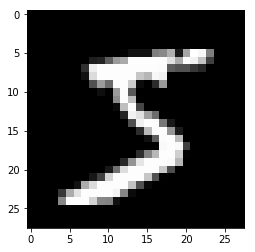

In [ ]:
imshow(x_example[0,:], cmap='gray')

Now lets make a color version! Here we need to be a little careful. In torch, an image is represented as $(N, C, W, H)$. But imsow expects a single image as $(W, H, C)$. So we will need to _permute_ the dimensions when using imshow. 

In [ ]:
x_as_color = torch.stack([x_example[0,:]]*3)

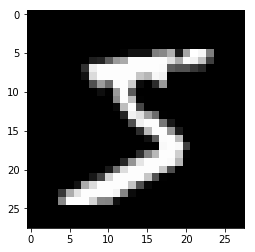

In [ ]:
imshow(x_as_color.permute(1,2,0))

Why was the above color image still black and white? Because the original image was black and white! We have the same value copied in the Red, Green, and Blue channels. If we turn off the Red and Blue channels (by setting them equal to zero), we would get a green number. 

In [ ]:
x_as_color = torch.stack([x_example[0,:]]*3)
x_as_color[0,:] = 0 #No Red
x_as_color[2,:] = 0 #No Blue

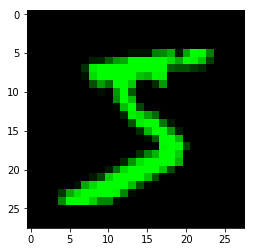

In [ ]:
imshow(x_as_color.permute(1,2,0))

Changing the color of the image above is an example of:
1) How the different channels impact what the data represents
2) What it means for this to be a _structured_ data representation. 

The order of the data has meaning, and we can't simply arbitrarily re-order things without potentially destroying the structure, and thus, the data. Lets look at this more explicitly. What would happen if we were to shuffle the data within a channel? Does it have the same important structured meaning?

In [ ]:
rand_order = torch.randperm(x_example.shape[1] * x_example.shape[2])
x_shuffled = x_example.view(-1)[rand_order].view(x_example.shape)

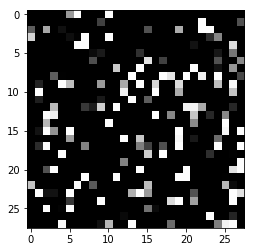

In [ ]:
imshow(x_shuffled[0,:], cmap='gray')

As you can see, it does! The meaning of the data, that it represents a numeric digit, is completely lost to us now. 

## What are Convolutions?

So what do we change now that we have our data shaped like an image? There is a _prior_ we would like to put into our model, which is that there is some kind of *spatial relationship* going on. Think about the pictures of the digit 5  above. Pick any black pixel. Most of its neighboring pixels are also black. Pick any white pixel, most of its neighbors are white or a shade of white. 

This is some spatial correlation. It doesn't really matter where int he image this happens, because it tends to happen everywhere. 

To take advantage of this, we will define some operations that are *spatial* in nature. The first, and most important, is one called *convolution*. Convolution takes an *input* image, and a *filter* . Here is a 1-dimensional example. The right-most image is the filter. The left most shows applying the filter at every step to an input (bottom row) and getting the resulting output (top). The middle image shows the same with a *stride*, where you skip over some elements. 

Notice that the output is a result of multiplying the filter values (pair-wise) at each location, and summing them all together. By using the same filter at every location in the input, we are exploting the spatial properties of the image. 

![alt text](http://cs231n.github.io/assets/cnn/stride.jpeg)

Convolutions can work for arbitrary dimensional tensors! Generally people stick to 1 and 2D inputs, and sometimes 3D (ignoring the number of channels, we will get back to that!). Here is an example of the computation taking place on a 2D image. 

![alt text](https://camo.githubusercontent.com/3309220c48ab22c9a5dfe7656c3f1639b6b1755d/68747470733a2f2f7777772e64726f70626f782e636f6d2f732f6e3134713930677a386138726278622f32645f636f6e766f6c7574696f6e2e706e673f7261773d31)

We can express a number of cool tasks as convolutions. So lets look at an example on images. 

You might be wondering... what do we do at the _edges of the image_? If we look at all our neighbors, but the pixels at the edge of the image don't have neighbors! There are usually two options for how to handle this, called *valid* and *same*. 

Valid convolution dosn't have a result at the edges, so the output image is slightly smaller than the input image. Same treats pixels "beyond" the edge of the image as implicit zeros, so that the image comes out the same. 

Both are valid strategies. We tend to use 'same' more often than not when working with CNNs. 

In [ ]:
print("Original:   ", img.shape)
 
blurry_img = convolve(img, blur_filter, mode='valid')
print("Valid Conv: ", blurry_img.shape)

blurry_img = convolve(img, blur_filter, mode='same')
print("Same Conv:  ", blurry_img.shape)

Original:    torch.Size([28, 28])
Valid Conv:  (26, 26)
Same Conv:   (28, 28)


Now, how do we tie this all together with that channels concept? 

Well, if the input has $C$ channels, the filter also has $C$ channels, and gets to look at every channel at once. We can also have more than one filter! That looks something like this

![alt text](https://i.stack.imgur.com/dywUh.png)


The multiple filters end up being the channels of the output. So if we have 1 input channel, and 5 filters, we would get a new image with 5 channels! 

The value in sticking this in with a neural network is that we can let the neural network figure out which filters it should learn on its own, we just give it the (very strong) prior that it should be using this spatial operation. 


## Putting it to Practice, our first CNN

Now we have discussed what a convolution is, lets bring it back to some mathematical symbols and PyTorch code! We've seen that we can take an image $I \in \mathbb{R}^{C, W, H}$ and apply a convolution using a filter $g  \in R^{C, W_g, H_g}$, to get a new result image $\mathbb{R}^{W', H'}$. If we are writing this out in math, we would write it as :

$$R = I \underbrace{\circledast}_{\text{"Convolve"}} g$$

Considering the examples above, we probably want more than just _one_ filter though. We want to have $K$ different filters. In this case we would then have a tensor that represents all of them as $G \in \mathbb{R}^{K, C, W_g, H_g}$, so that we get a new result $R \in \mathbb{R}^{K, W', H'}$ when we write

$$R = I \circledast G$$

Now, when we had a fully connected layer, we wrote something like $f(\boldsymbol{x}) = \text{tanh}\left(\boldsymbol{x}^T \boldsymbol{W}^{(h_1)}_{d \times n}\right) \boldsymbol{W}^{(\text{out})}_{n \times \text{classes}} $ for a single hidden layer with $n$ hidden units/neurons. The mathematical notation we would use to describe a network with one _convolutional_ hidden layer is very similar:

$$f(\boldsymbol{x}) = \text{tanh}\left(\underbrace{\boldsymbol{x}^T \circledast \boldsymbol{W}^{(h_1)}_{K, C \times w \times h}}_{\text{nn.Conv2d(C, K, (w,h))}}\right) \boldsymbol{W}^{(\text{out})}_{(C \cdot w \cdot h) \times C}$$

In fact, you can mentally think of "Convolution" layers as "Spatial Linear" layers. Remember how applying multiple linear layers in a row was equivalent to one linear layer? The same is true for convolutional layers. You need to insert non-linearities between the layers in order to increase the representational power. 

In [ ]:
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")


#This is defining a simple PyTorch laye to convert a tensor from (N, C, W, H) 
#to one of shape (N, D=C*W*H). Despite being useful, the pyTorch folks refuse to
#add one. We will use it later!
class Flatten(nn.Module):
    def forward(self, input):
        return input.view(input.size(0), -1)
    
mnist_train_loader = DataLoader(mnist_data_train, shuffle=True)
mnist_test_loader = DataLoader(mnist_data_test)

In [ ]:
#How many values are in the input? We use this to help determine the size of subsequent layers
D = 28*28 #28 * 28 images 
#How many channels are in the input?
C = 1
#How many classes are there?
classes = 10
#A simple convolutional network:
model_cnn = nn.Sequential(
  #Conv2d follows the pattern of:
  #Conv2d(# of input channels, #filters/output-channels, #filter-size)
  #For the manditory arguments. 
  nn.Conv2d(C, 32, (3,3), padding=1), 
  #We have to tell pyTorch exactly how many pixels to pad by. 
  #To get 'same' style padding, we want padding=floor(filter-size/2)
  nn.Tanh(),
  Flatten(), #Convert from (B, C, H, W) ->(B, D). This way we can use a Linear layer after
  nn.Linear(32*D, classes),
)

#for comparison, lets define a linear model of similar complexity
model_linear = nn.Sequential(
  Flatten(), 
  nn.Linear(D, 32*3*3), #Why did we do 32*3*3?
  nn.Tanh(),
  nn.Linear(32*3*3, classes),
)

So does a CNN perform better? Lets find out! We can train both, measure accuracy on the test set, and look at the accuracy after each epoch. 

In [ ]:
loss_func = nn.CrossEntropyLoss()
cnn_results = train_simple_network(model_cnn, loss_func, mnist_train_loader, val_loader=mnist_test_loader, 
                                   score_funcs={'Accuracy': accuracy_score}, device=device, epochs=10)

Epoch:   0%|          | 0/10 [00:00<?, ?it/s]

Train Batch:   0%|          | 0/60000 [00:00<?, ?it/s]

Train Batch:   0%|          | 0/60000 [00:00<?, ?it/s]

Train Batch:   0%|          | 0/60000 [00:00<?, ?it/s]

Train Batch:   0%|          | 0/60000 [00:00<?, ?it/s]

Train Batch:   0%|          | 0/60000 [00:00<?, ?it/s]

Train Batch:   0%|          | 0/60000 [00:00<?, ?it/s]

Train Batch:   0%|          | 0/60000 [00:00<?, ?it/s]

Train Batch:   0%|          | 0/60000 [00:00<?, ?it/s]

Train Batch:   0%|          | 0/60000 [00:00<?, ?it/s]

Train Batch:   0%|          | 0/60000 [00:00<?, ?it/s]

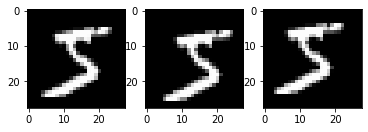

In [ ]:
img_indx = 0
img, correct_class = mnist_data_train[img_indx]
img = img[0,:]
#move to the lower right, then upper left
img_lr = np.roll(np.roll(img, 1, axis=1), 1, axis=0)
img_ul = np.roll(np.roll(img, -1, axis=1), -1, axis=0)
#plot the images
f, axarr = plt.subplots(1,3)
axarr[0].imshow(img, cmap='gray')
axarr[1].imshow(img_lr, cmap='gray')
axarr[2].imshow(img_ul, cmap='gray')
plt.show()

In [ ]:
#eval mode since we are not training
model = model_cnn.cpu().eval()

def pred(model, img):
    with torch.no_grad():#Always turn off gradients when evaluating
        w, h = img.shape#Whats the width/height of the image
        if not isinstance(img, torch.Tensor):
            img = torch.tensor(img)
        x = img.reshape(1,-1,w,h)#reshape it as (B, C, W, H)
        logits = model(x) #Get the logits
        y_hat = F.softmax(logits, dim=1)#Turn into probabilities 
        return y_hat.numpy().flatten()#convert prediction to numpy array. 

In [ ]:
img_pred = pred(model, img)
img_lr_pred = pred(model, img_lr)
img_ul_pred = pred(model, img_ul)

print("Org Img Class {} Prob:         ".format(correct_class) , img_pred[correct_class])
print("Lower Right Img Class {} Prob: ".format(correct_class) , img_lr_pred[correct_class])
print("Uper Left Img Class {} Prob:   ".format(correct_class) , img_ul_pred[correct_class])

Org Img Class 5 Prob:          0.8168466
Lower Right Img Class 5 Prob:  0.26723132
Uper Left Img Class 5 Prob:    0.9272502


In [ ]:
fc_results = train_simple_network(model_linear, loss_func, mnist_train_loader, val_loader=mnist_test_loader, 
                                   score_funcs={'Accuracy': accuracy_score}, device=device, epochs=10)

Epoch:   0%|          | 0/10 [00:00<?, ?it/s]

Train Batch:   0%|          | 0/60000 [00:00<?, ?it/s]

Train Batch:   0%|          | 0/60000 [00:00<?, ?it/s]

Train Batch:   0%|          | 0/60000 [00:00<?, ?it/s]

Train Batch:   0%|          | 0/60000 [00:00<?, ?it/s]

Train Batch:   0%|          | 0/60000 [00:00<?, ?it/s]

Train Batch:   0%|          | 0/60000 [00:00<?, ?it/s]

Train Batch:   0%|          | 0/60000 [00:00<?, ?it/s]

Train Batch:   0%|          | 0/60000 [00:00<?, ?it/s]

Train Batch:   0%|          | 0/60000 [00:00<?, ?it/s]

Train Batch:   0%|          | 0/60000 [00:00<?, ?it/s]

In [ ]:
model = model_cnn.cpu().eval()
img_pred = pred(model, img)
img_lr_pred = pred(model, img_lr)
img_ul_pred = pred(model, img_ul)

print("Org Img Class {} Prob:         ".format(correct_class) , img_pred[correct_class])
print("Lower Right Img Class {} Prob: ".format(correct_class) , img_lr_pred[correct_class])
print("Uper Left Img Class {} Prob:   ".format(correct_class) , img_ul_pred[correct_class])

Org Img Class 5 Prob:          0.8168466
Lower Right Img Class 5 Prob:  0.26723132
Uper Left Img Class 5 Prob:    0.9272502


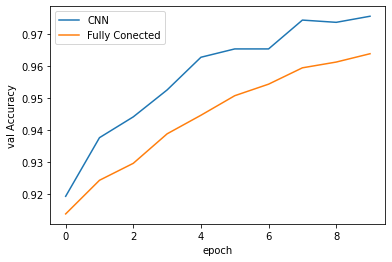

In [ ]:
sns.lineplot(x='epoch', y='val Accuracy', data=cnn_results, label='CNN')
sns.lineplot(x='epoch', y='val Accuracy', data=fc_results, label='Fully Conected')

One epoch of training out CNN has _better accuracy_ than our fully connected network ever achieves! While our CNN took longer to train, the results are well worth it. 

Why did it perform so much better? Because we have given the network information about the problem (convolutions) via the structure of the domain (data are images). 

This does not mean CNNs are always better. If the assumptions of a CNN are not true, or not accurate, they will not perform well. 

In [ ]:
pixel_shuffle = torch.randperm(28*28)

transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Lambda(lambda x: x.view(-1)[pixel_shuffle].view(1,28,28)) # Shuffles the pixel order
])

mnist_train_loader_sp = DataLoader(torchvision.datasets.MNIST("./", train=True, download=True, transform=transform),
                                   shuffle=True)
mnist_test_loader_sp = DataLoader(torchvision.datasets.MNIST("./", train=False, download=True, transform=transform))



  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./MNIST/raw/train-images-idx3-ubyte.gz to ./MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./MNIST/raw/train-labels-idx1-ubyte.gz to ./MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./MNIST/raw/t10k-images-idx3-ubyte.gz to ./MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./MNIST/raw/t10k-labels-idx1-ubyte.gz to ./MNIST/raw



In [ ]:
def weight_reset(m):
    if "reset_parameters" in dir(m):
        m.reset_parameters()
model_cnn.apply(weight_reset)
model_linear.apply(weight_reset)

Sequential(
  (0): Flatten()
  (1): Linear(in_features=784, out_features=288, bias=True)
  (2): Tanh()
  (3): Linear(in_features=288, out_features=10, bias=True)
)

In [ ]:
cnn_results_sp = train_simple_network(model_cnn, loss_func, mnist_train_loader_sp, val_loader=mnist_test_loader_sp, 
                                   score_funcs={'Accuracy': accuracy_score}, device=device, epochs=10)
fc_results_sp = train_simple_network(model_linear, loss_func, mnist_train_loader_sp, val_loader=mnist_test_loader_sp, 
                                   score_funcs={'Accuracy': accuracy_score}, device=device, epochs=10)

Epoch:   0%|          | 0/10 [00:00<?, ?it/s]

Train Batch:   0%|          | 0/60000 [00:00<?, ?it/s]

Train Batch:   0%|          | 0/60000 [00:00<?, ?it/s]

Train Batch:   0%|          | 0/60000 [00:00<?, ?it/s]

Train Batch:   0%|          | 0/60000 [00:00<?, ?it/s]

Train Batch:   0%|          | 0/60000 [00:00<?, ?it/s]

Train Batch:   0%|          | 0/60000 [00:00<?, ?it/s]

Train Batch:   0%|          | 0/60000 [00:00<?, ?it/s]

Train Batch:   0%|          | 0/60000 [00:00<?, ?it/s]

Train Batch:   0%|          | 0/60000 [00:00<?, ?it/s]

Train Batch:   0%|          | 0/60000 [00:00<?, ?it/s]

Epoch:   0%|          | 0/10 [00:00<?, ?it/s]

Train Batch:   0%|          | 0/60000 [00:00<?, ?it/s]

Train Batch:   0%|          | 0/60000 [00:00<?, ?it/s]

Train Batch:   0%|          | 0/60000 [00:00<?, ?it/s]

Train Batch:   0%|          | 0/60000 [00:00<?, ?it/s]

Train Batch:   0%|          | 0/60000 [00:00<?, ?it/s]

Train Batch:   0%|          | 0/60000 [00:00<?, ?it/s]

Train Batch:   0%|          | 0/60000 [00:00<?, ?it/s]

Train Batch:   0%|          | 0/60000 [00:00<?, ?it/s]

Train Batch:   0%|          | 0/60000 [00:00<?, ?it/s]

Train Batch:   0%|          | 0/60000 [00:00<?, ?it/s]

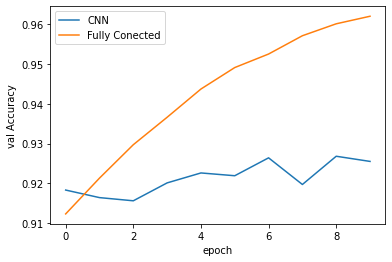

In [ ]:
sns.lineplot(x='epoch', y='val Accuracy', data=cnn_results_sp, label='CNN')
sns.lineplot(x='epoch', y='val Accuracy', data=fc_results_sp, label='Fully Conected')

## Pooling Layers

Just like with our feed-forward networks, we can make our convolutional networks more powerful by stacking more and more layers with non-linearities inserted inbetween. But before we do that, there is a special type of layer we like to use with CNNs called a _pooling_ layer. 

Pooling helps us solve a problem, that we aren't fully exploiting the spatial nature of our data. The benefits of a pooling layer are best demonstrated with an example. Below, lets pick a class and example, and create a few shifted versions of the image. 


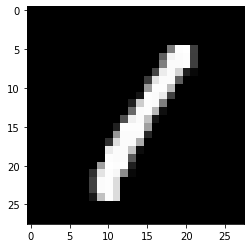

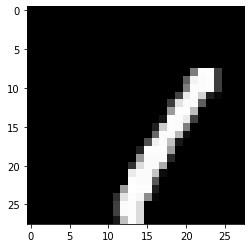

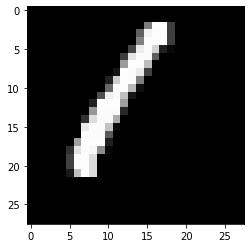

In [ ]:
img_indx = 3

img, correct_class = mnist_data_train[img_indx]
img = img[0,:]

plt.imshow(img,cmap='gray')
plt.show()

img_lr = np.roll(np.roll(img, 3, axis=1), 3, axis=0)
img_ul = np.roll(np.roll(img, -3, axis=1), -3, axis=0)

plt.imshow(img_lr,cmap='gray')
plt.show()

plt.imshow(img_ul,cmap='gray')
plt.show()

Clearly, all three versions of the above image are the same digit. It does not matter that we shifted the content up or down, left or right, by just a few pixels. _But our model does not know this_! If we classify different versions of the above image, there is a good chance we get it wrong!

In [ ]:
model = model_cnn.cpu().eval()


img_pred = nn.functional.softmax(model(torch.tensor(img[np.newaxis,np.newaxis,...])), dim=1).detach().numpy().flatten()
img_lr_pred = nn.functional.softmax(model(torch.tensor(img_lr[np.newaxis,np.newaxis,...])), dim=1).detach().numpy().flatten()
img_ul_pred = nn.functional.softmax(model(torch.tensor(img_ul[np.newaxis,np.newaxis,...])), dim=1).detach().numpy().flatten()


print("Org Img Class {} Prob:         ".format(correct_class) , img_pred[correct_class])
print("Lower Right Img Class {} Prob: ".format(correct_class) , img_lr_pred[correct_class])
print("Uper Left Img Class {} Prob:   ".format(correct_class) , img_ul_pred[correct_class])

Org Img Class 1 Prob:          0.62052214
Lower Right Img Class 1 Prob:  0.033298556
Uper Left Img Class 1 Prob:    0.12899026


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  after removing the cwd from sys.path.


Clearly, we want all three of the above examples to receive the same classification. They are *essentially* the same image, the content has just been shifted around. 

What we desire is a property called  *translation invariance*. To be invariant to property X means that our output does not change based on X. We don't want translations (shifting up/down) to change our decisions. So we want to be translation invariant. (A similar property is being equivariant, meaning we recognize property X as having occurred, where invariance mean we can't even tell X happened - because it has NO impact on us). 

We can obtain some partial translation invariance with an operation known as *pooling*. Specifically, we will look at max-pooling. 

What is max pooling? Similar to convolution, we will apply the same function to multiple locations in an image. We will generally stick to even sized pooling filters. And we will slide a function around the image that takes the maximum of all the inputs under consideration. A small 2D example looks like this:

![alt text](http://cs231n.github.io/assets/cnn/maxpool.jpeg)

We apply this simple operation to every channel independently. If we do max-pooling with a 2x2 filter (the norm), we end up with an image 1/4 the size (half as many rows, and half as many columns)!

This also means we have less data to work with. What is commonly done in the comunity is to double the number of filters after every round of pooling, so that the amount of computation being done at every layer remains roughly  the same. Lets try it out!


In [ ]:
model_cnn_pool = nn.Sequential(
  nn.Conv2d(C, 32, (3,3), padding=1), 
  nn.MaxPool2d((2,2)),
  nn.Tanh(),
  nn.Conv2d(32, 32, (3,3), padding=1), 
  nn.MaxPool2d((2,2)),
  nn.Tanh(),
  Flatten(), 
  #Why did we reduce the number of units into the Linear layer by a factor of 4? 
  #because pooling a 2x2 grid down to one value means we go from 4 values, down to 1. 
  nn.Linear(32*D//(4**2), classes),
)

In [ ]:
model_cnn_02 = nn.Sequential(
  nn.Conv2d(C, 32, (3,3), padding=1), 
  nn.Tanh(),
  nn.Conv2d(32*C, 32, (3,3), padding=1), 
  nn.Tanh(),
  Flatten(), 
  #Why did we reduce the number of units into the Linear layer by a factor of 4? 
  #because pooling a 2x2 grid down to one value means we go from 4 values, down to 1. 
  nn.Linear(32*D, classes),
)

In [ ]:
cnn_results_with_pool = train_simple_network(model_cnn_pool, loss_func, mnist_train_loader, val_loader=mnist_test_loader, 
                                   score_funcs={'Accuracy': accuracy_score}, device=device, epochs=10)

Epoch:   0%|          | 0/10 [00:00<?, ?it/s]

Train Batch:   0%|          | 0/60000 [00:00<?, ?it/s]

Train Batch:   0%|          | 0/60000 [00:00<?, ?it/s]

Train Batch:   0%|          | 0/60000 [00:00<?, ?it/s]

Train Batch:   0%|          | 0/60000 [00:00<?, ?it/s]

Train Batch:   0%|          | 0/60000 [00:00<?, ?it/s]

Train Batch:   0%|          | 0/60000 [00:00<?, ?it/s]

Train Batch:   0%|          | 0/60000 [00:00<?, ?it/s]

Train Batch:   0%|          | 0/60000 [00:00<?, ?it/s]

Train Batch:   0%|          | 0/60000 [00:00<?, ?it/s]

Train Batch:   0%|          | 0/60000 [00:00<?, ?it/s]

In [ ]:
model = model_cnn_pool.cpu().eval()

img_pred = nn.functional.softmax(model(torch.tensor(img[np.newaxis,np.newaxis,...])), dim=1).detach().numpy().flatten()
img_lr_pred = nn.functional.softmax(model(torch.tensor(img_lr[np.newaxis,np.newaxis,...])), dim=1).detach().numpy().flatten()
img_ul_pred = nn.functional.softmax(model(torch.tensor(img_ul[np.newaxis,np.newaxis,...])), dim=1).detach().numpy().flatten()

print("Org Img Class {} Prob:         ".format(correct_class) , img_pred[correct_class])
print("Lower Right Img Class {} Prob: ".format(correct_class) , img_lr_pred[correct_class])
print("Uper Left Img Class {} Prob:   ".format(correct_class) , img_ul_pred[correct_class])

Org Img Class 1 Prob:          0.9997305
Lower Right Img Class 1 Prob:  0.1953174
Uper Left Img Class 1 Prob:    0.9209136


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
cnn_results_with_pool

epoch   total time    train loss     val loss  train Accuracy  val Accuracy
0      0   125.359358  20572.276159  1371.778230        0.905033        0.9620
1      1   252.150482   6891.603489   795.745984        0.967417        0.9774
2      2   376.746496   4855.021828   610.245689        0.976800        0.9819
3      3   501.618124   3971.409396   545.550778        0.981017        0.9827
4      4   626.826941   3417.616207   493.825378        0.983267        0.9844
5      5   751.146087   3060.132423   521.031333        0.985167        0.9839
6      6   875.862811   2796.175717   444.226427        0.986450        0.9863
7      7  1000.598711   2567.606267   401.159843        0.987717        0.9863
8      8  1125.352497   2404.064283   428.008250        0.988117        0.9865
9      9  1250.139456   2252.064079   384.533244        0.988600        0.9878

In [ ]:
cnn_results_02 = train_simple_network(model_cnn_02, loss_func, mnist_train_loader, val_loader=mnist_test_loader, 
                                   score_funcs={'Accuracy': accuracy_score}, device=device, epochs=10)

Epoch:   0%|          | 0/10 [00:00<?, ?it/s]

Train Batch:   0%|          | 0/60000 [00:00<?, ?it/s]

Train Batch:   0%|          | 0/60000 [00:00<?, ?it/s]

Train Batch:   0%|          | 0/60000 [00:00<?, ?it/s]

Train Batch:   0%|          | 0/60000 [00:00<?, ?it/s]

Train Batch:   0%|          | 0/60000 [00:00<?, ?it/s]

Train Batch:   0%|          | 0/60000 [00:00<?, ?it/s]

Train Batch:   0%|          | 0/60000 [00:00<?, ?it/s]

Train Batch:   0%|          | 0/60000 [00:00<?, ?it/s]

Train Batch:   0%|          | 0/60000 [00:00<?, ?it/s]

Train Batch:   0%|          | 0/60000 [00:00<?, ?it/s]

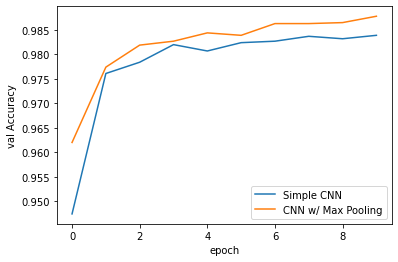

In [ ]:
sns.lineplot(x='epoch', y='val Accuracy', data=cnn_results_02, label='Simple CNN')
sns.lineplot(x='epoch', y='val Accuracy', data=cnn_results_with_pool, label='CNN w/ Max Pooling')

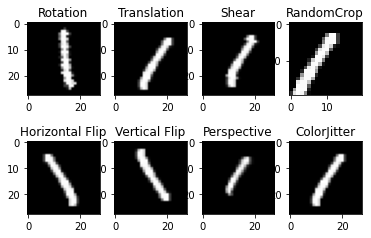

In [ ]:
#Several built-in transformations, given some agressive values to make their impact more obvious.  
sample_transforms = {
    "Rotation" : transforms.RandomAffine(degrees=45),
    "Translation" : transforms.RandomAffine(degrees=0, translate=(0.1,0.1)),
    "Shear": transforms.RandomAffine(degrees=0, shear=45),
    "RandomCrop" : transforms.RandomCrop((20,20)),
    "Horizontal Flip" : transforms.RandomHorizontalFlip(p=1.0),
    "Vertical Flip": transforms.RandomVerticalFlip(p=1.0),
    "Perspective": transforms.RandomPerspective(p=1.0),   
    "ColorJitter" : transforms.ColorJitter(brightness=0.9, contrast=0.9)
}
#Convert the Tensor image back to a PIL image using a transform
pil_img = transforms.ToPILImage()(img)
#Plot a randomy application of each transform
f, axarr = plt.subplots(2,4)
for count, (name, t) in enumerate(sample_transforms.items()):
    row = count % 4
    col = count // 4
    axarr[col,row].imshow(t(pil_img), cmap='gray')
    axarr[col,row].set_title(name)
plt.show()

In [ ]:
train_transform = transforms.Compose([
    transforms.RandomAffine(degrees=5, translate=(0.05, 0.05), scale=(0.98, 1.02)),
    transforms.ToTensor(),
])

test_transform = transforms.ToTensor()

mnist_train_t = torchvision.datasets.MNIST("./data", train=True, transform=train_transform)
mnist_test_t = torchvision.datasets.MNIST("./data", train=False, transform=test_transform)
mnist_train_loader_t = DataLoader(mnist_train_t, shuffle=True,  batch_size=16, num_workers=2)
mnist_test_loader_t = DataLoader(mnist_test_t, batch_size=16, num_workers=2)

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:566: UserWarning: This DataLoader will create 5 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


In [ ]:
cnn_results_with_pool_augmented = train_simple_network(model_cnn_pool, loss_func, mnist_train_loader_t, val_loader=mnist_test_loader_t, 
                                   score_funcs={'Accuracy': accuracy_score}, device=device, epochs=10)

Epoch:   0%|          | 0/10 [00:00<?, ?it/s]

Train Batch:   0%|          | 0/3750 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:566: UserWarning: This DataLoader will create 5 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


Train Batch:   0%|          | 0/3750 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:566: UserWarning: This DataLoader will create 5 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:566: UserWarning: This DataLoader will create 5 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


Train Batch:   0%|          | 0/3750 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:566: UserWarning: This DataLoader will create 5 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:566: UserWarning: This DataLoader will create 5 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


Train Batch:   0%|          | 0/3750 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:566: UserWarning: This DataLoader will create 5 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:566: UserWarning: This DataLoader will create 5 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


Train Batch:   0%|          | 0/3750 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:566: UserWarning: This DataLoader will create 5 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:566: UserWarning: This DataLoader will create 5 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


Train Batch:   0%|          | 0/3750 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:566: UserWarning: This DataLoader will create 5 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:566: UserWarning: This DataLoader will create 5 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


Train Batch:   0%|          | 0/3750 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:566: UserWarning: This DataLoader will create 5 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:566: UserWarning: This DataLoader will create 5 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


Train Batch:   0%|          | 0/3750 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:566: UserWarning: This DataLoader will create 5 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:566: UserWarning: This DataLoader will create 5 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


Train Batch:   0%|          | 0/3750 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:566: UserWarning: This DataLoader will create 5 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:566: UserWarning: This DataLoader will create 5 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


Train Batch:   0%|          | 0/3750 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:566: UserWarning: This DataLoader will create 5 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:566: UserWarning: This DataLoader will create 5 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


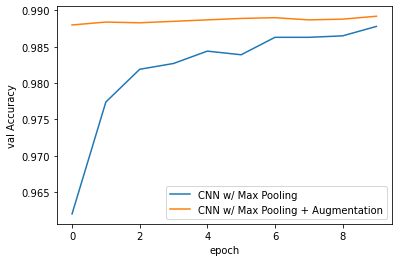

In [ ]:
sns.lineplot(x='epoch', y='val Accuracy', data=cnn_results_with_pool, label='CNN w/ Max Pooling')
sns.lineplot(x='epoch', y='val Accuracy', data=cnn_results_with_pool_augmented, label='CNN w/ Max Pooling + Augmentation')